# Sprint 11. Agrupa els diferents vols

## Exercici 1. Agrupa els diferents vols utilitzant l'algoritme de K-means.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("../estructures_dataframe/DelayedFlights.csv", sep=",")

In [3]:
df = df.set_index('Unnamed: 0')

#Dropping Na
df = df.dropna()

In [4]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0
18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,4,N674AA,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0


In [5]:
df.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000
mean,2008.000,6.065,15.725,3.980,1558.832,1487.949,1616.749,1652.458,2276.526,135.378,131.764,107.420,63.291,59.677,741.587,7.297,20.660,0.000,0.000,19.179,3.703,15.022,0.090,25.296
std,0.000,3.509,8.793,1.993,454.330,421.178,583.942,461.737,1997.547,72.296,69.532,68.175,60.754,59.869,559.364,6.033,16.680,0.000,0.000,43.546,21.492,33.833,2.023,42.055
min,2008.000,1.000,1.000,1.000,1.000,0.000,1.000,0.000,1.000,14.000,-21.000,0.000,15.000,6.000,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2008.000,3.000,8.000,2.000,1232.000,1150.000,1326.000,1340.000,637.000,83.000,80.000,58.000,26.000,24.000,334.000,4.000,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2008.000,6.000,16.000,4.000,1618.000,1529.000,1737.000,1722.000,1589.000,118.000,115.000,90.000,43.000,41.000,595.000,6.000,16.000,0.000,0.000,2.000,0.000,2.000,0.000,8.000
75%,2008.000,9.000,23.000,6.000,1924.000,1830.000,2048.000,2022.000,3676.000,167.000,161.000,136.000,79.000,75.000,972.000,8.000,24.000,0.000,0.000,21.000,0.000,15.000,0.000,33.000
max,2008.000,12.000,31.000,7.000,2400.000,2359.000,2400.000,2359.000,9741.000,1114.000,660.000,1091.000,2461.000,2467.000,4962.000,240.000,422.000,0.000,0.000,2436.000,1352.000,1357.000,392.000,1316.000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247486 entries, 4 to 7009718
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1247486 non-null  int64  
 1   Month              1247486 non-null  int64  
 2   DayofMonth         1247486 non-null  int64  
 3   DayOfWeek          1247486 non-null  int64  
 4   DepTime            1247486 non-null  float64
 5   CRSDepTime         1247486 non-null  int64  
 6   ArrTime            1247486 non-null  float64
 7   CRSArrTime         1247486 non-null  int64  
 8   UniqueCarrier      1247486 non-null  object 
 9   FlightNum          1247486 non-null  int64  
 10  TailNum            1247486 non-null  object 
 11  ActualElapsedTime  1247486 non-null  float64
 12  CRSElapsedTime     1247486 non-null  float64
 13  AirTime            1247486 non-null  float64
 14  ArrDelay           1247486 non-null  float64
 15  DepDelay           1247486 non-n

### Com que l'agrupació mitjançant K-means es veu afectada per l'escala de les dades, l'estandardització d'aquestes evitarà que certes variables dominin l'agrupació només per tindre una escala més gran.

In [7]:
# Seleccionem les dades numèriques del conjunt de dades
df_num = df.select_dtypes(exclude=['object'])

In [8]:
# Realitzem l'estandardització mantenint el mateix índex i nom de les columnes
from sklearn import preprocessing

scaled_data = pd.DataFrame(preprocessing.scale(df_num), index = df_num.index, columns = df_num.columns)

In [9]:
scaled_data.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000
mean,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000
std,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000
min,0.000,-1.444,-1.675,-1.495,-3.429,-3.533,-2.767,-3.579,-1.139,-1.679,-2.197,-1.576,-0.795,-0.897,-1.306,-1.210,-1.239,0.000,0.000,-0.440,-0.172,-0.444,-0.045,-0.602
25%,0.000,-0.874,-0.879,-0.993,-0.719,-0.802,-0.498,-0.677,-0.821,-0.724,-0.744,-0.725,-0.614,-0.596,-0.729,-0.547,-0.579,0.000,0.000,-0.440,-0.172,-0.444,-0.045,-0.602
50%,0.000,-0.019,0.031,0.010,0.130,0.097,0.206,0.151,-0.344,-0.240,-0.241,-0.256,-0.334,-0.312,-0.262,-0.215,-0.279,0.000,0.000,-0.395,-0.172,-0.385,-0.045,-0.411
75%,0.000,0.836,0.827,1.013,0.804,0.812,0.739,0.800,0.701,0.437,0.420,0.419,0.259,0.256,0.412,0.116,0.200,0.000,0.000,0.042,-0.172,-0.001,-0.045,0.183
max,0.000,1.691,1.737,1.515,1.851,2.068,1.341,1.530,3.737,13.536,7.597,14.427,39.466,40.210,7.545,38.570,24.061,0.000,0.000,55.500,62.736,39.665,193.754,30.691


In [10]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247486 entries, 4 to 7009718
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1247486 non-null  float64
 1   Month              1247486 non-null  float64
 2   DayofMonth         1247486 non-null  float64
 3   DayOfWeek          1247486 non-null  float64
 4   DepTime            1247486 non-null  float64
 5   CRSDepTime         1247486 non-null  float64
 6   ArrTime            1247486 non-null  float64
 7   CRSArrTime         1247486 non-null  float64
 8   FlightNum          1247486 non-null  float64
 9   ActualElapsedTime  1247486 non-null  float64
 10  CRSElapsedTime     1247486 non-null  float64
 11  AirTime            1247486 non-null  float64
 12  ArrDelay           1247486 non-null  float64
 13  DepDelay           1247486 non-null  float64
 14  Distance           1247486 non-null  float64
 15  TaxiIn             1247486 non-n

### Realitzem PCA per reduïr la dimensionamitat del conjunt de dades

Tot i que reduir la dimensionalitat de les dades millora el rendiment dels models, també ens aporta una capa d'opacitat en executar el K-means, ja que no sabem en quines variables s'ha basat el model per fer les agrupacions i, per tant, no sabem què tenen exactament en comú els diferents clústers que hem creat.

Mitjançant el PCA podem reduïr el nombre de variables quasi a la meitat (de 24 a 13) sense perdre gaire variança.

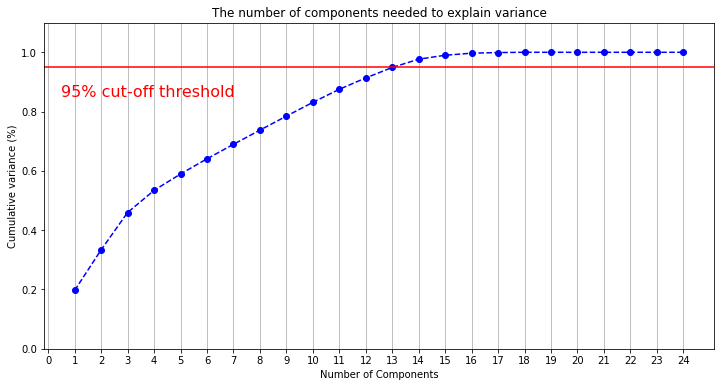

In [11]:
# Calculem el nombre de components que necesitem per explicar el % de la variança que ens interesa. 
# En el nostre cas necessitem 13 components per explicar, com a mínim, el 95% de la variança.

from sklearn.decomposition import PCA
pca = PCA().fit(scaled_data)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 25, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 25, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 13)
pca.fit(scaled_data)
reduced = pca.transform(scaled_data)

### Utilitzem el mètode elbow per identificar el nombre òptim de clústers

Si observem el gràfic a continuació, podem veure com a partir dels 4 clústers es forma un "colze", és a dir, la línia es va fent cada vegada más horitzontal. Això indica que com més augmenta el nombre de clústers, menor és la distància entre ells, és a dir, més s'hi assemblen els diferents clústers entre ells. Com l'objectiu de la clusterització és obtindre grups on la distancia entre data points dins del grup sigui la mínima i la distancia entre clústers, la màxima, agrupar els vols en 4 grups sembla una bona idea (més endavant, en l'exercici 3, veurem si el paràmetre silouhette ens dona la raó).

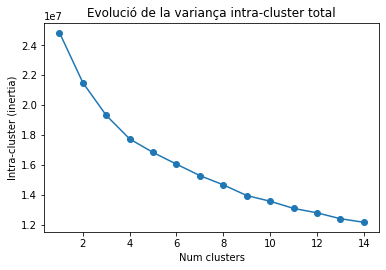

In [21]:
from sklearn.cluster import KMeans

range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    kmeans.fit(reduced)
    inertias.append(kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolució de la variança intra-clúster total")
ax.set_xlabel('Num. clústers')
ax.set_ylabel('Intra-clúster (inertia)');

#### Realitzem l'agrupació

In [14]:
kmeans = KMeans(n_clusters=4, n_init=25, random_state=123)
kmeans.fit(reduced)

KMeans(n_clusters=4, n_init=25, random_state=123)

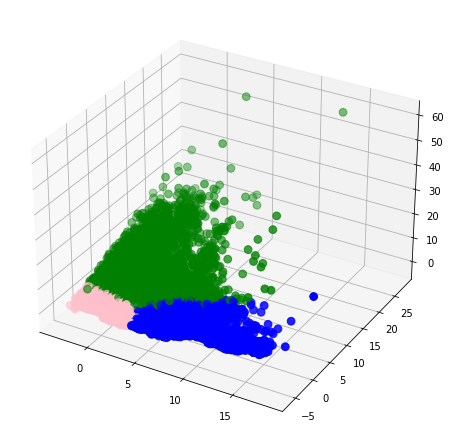

In [15]:
# Predicting the clusters
labels = kmeans.predict(reduced)
# Getting the cluster centers
C = kmeans.cluster_centers_
#colores=['red','green','blue','cyan','black','gray','pink','purple','yellow']
colores=['pink','purple','blue','green']
asignar=[]
for row in labels:
    asignar.append(colores[row])

from mpl_toolkits.mplot3d import Axes3D    
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(reduced[:, 0], reduced[:, 1], reduced[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

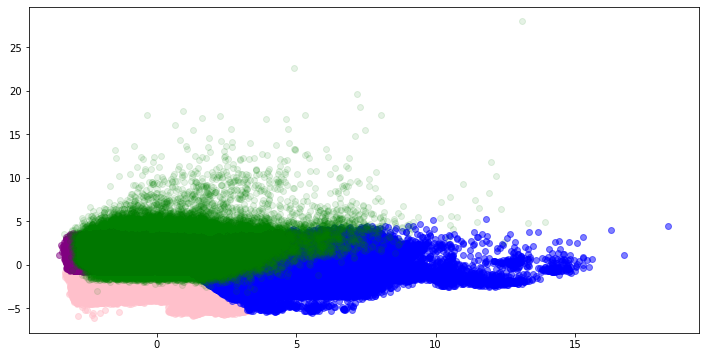

In [16]:
#filter rows of original data
filtered_label0 = reduced[labels == 0]
filtered_label1 = reduced[labels == 1]
filtered_label2 = reduced[labels == 2]
filtered_label3 = reduced[labels == 3]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'pink', alpha=0.5)
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'purple', alpha=0.5)
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'blue', alpha=0.5)
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'green', alpha=0.1)
plt.show()

### Comptem el nombre d'elements que hi ha en cada clúster

Tot i que en el gràfic anterior potser no ho sembla, el clúster 1 (lila) és el que més elements conté (543 338 elements), seguit del clúster 0 (rosa) amb 400 283 elements. El cúster 2 (blau) amb 187 262 elements i el clúster 3 (verd) amb 116 603 elements són els clústers que agrupen menys vols.


In [17]:
from collections import Counter, defaultdict
print(Counter(kmeans.labels_))

Counter({1: 543338, 0: 400283, 2: 187262, 3: 116603})


## Exercici 2. Agrupa els diferents vols utilitzant l'algoritme de clustering jeràrquic.

## Reducció del conjunt de dades

Com que el conjunt de dades té més d'1 milió de registres, podem utilitzar la tècnica de random sampling per seleccionar només un subconjunt de les dades (2%) i fer que el dendograma s'executi més ràpidament. Aprofitem el df ja escalat de l'exercici anterior.

In [18]:
from random import sample

df_reduit = scaled_data.sample(frac=0.02, replace=True, random_state=1)

df_reduit.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,
636553,0.0,-1.158585,-0.423680,-0.993385,1.523492,1.690617,1.240280,1.304947,-1.107622,-1.180944,-1.104011,-1.018274,-0.284608,-0.144937,-0.898496,-0.878008,-0.639115,0.0,0.0,-0.440438,-0.172317,-0.443992,-0.044563,0.492298
2470826,0.0,-0.303624,1.395949,-0.491696,0.612260,0.634057,0.567268,0.568597,-1.132152,-0.890472,-0.744464,-0.666236,-0.498587,-0.295266,-0.651788,-0.712260,-0.878926,0.0,0.0,-0.440438,-0.172317,-0.443992,-0.044563,0.183178
2352374,0.0,-0.588611,0.372408,1.013369,1.061273,1.097044,1.094718,1.242141,-0.221034,2.484526,2.937295,2.707459,-0.547967,-0.144937,2.487491,-0.546511,-0.099541,0.0,0.0,-0.256726,-0.172317,-0.443992,-0.044563,-0.078385
2467909,0.0,-0.303624,1.282222,-0.993385,1.481673,1.346345,1.255693,1.218318,0.610486,-0.793649,-0.744464,-0.563559,0.521926,0.623410,-0.537372,-0.712260,-0.878926,0.0,0.0,-0.302654,-0.172317,-0.443992,-0.044563,1.514771
4277277,0.0,0.551336,0.031227,1.013369,-0.015037,0.099841,0.180243,0.113793,-0.725153,-0.627665,-0.528736,-0.460881,-0.761945,-0.629330,-0.444409,-0.215014,-0.759021,0.0,0.0,-0.348582,-0.172317,-0.443992,-0.044563,-0.292392


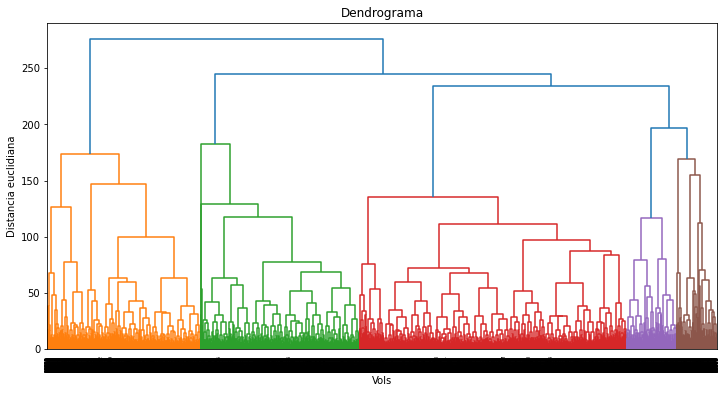

In [19]:
#3 Using the dendrogram to find the optimal numbers of clusters. 
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(df_reduit, method  = "ward"))
plt.title('Dendrograma')
plt.xlabel('Vols')
plt.ylabel('Distancia euclidiana')
plt.show()

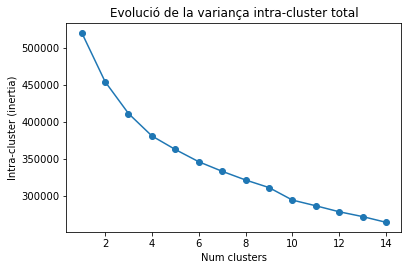

In [23]:
# Executem el mètode elbow per compararlo amb el dendograma.

range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    kmeans.fit(df_reduit)
    inertias.append(kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolució de la variança intra-clúster total")
ax.set_xlabel('Num clústers')
ax.set_ylabel('Intra-clúster (inertia)');

Segons el dendograma anterior, el nombre ideal de clústers és cinc. No obstant, si executem el mètode elbow per a aquest subconjunt de dades reduït podem observar com el primer colze es segueix formant a partir del nombre 4. De fet, en el dendograma veiem com els clústers lila i marró podrien formar-ne un de sol i llavors el dendograma coincidiria amb el mètode elbow.

## Exercici 3. Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

El coeficient silhouette és una medida de cohesió i separació de clústers. Quantifica com de bé encaixa un punt de dades en el clúster on ha estat asignat. Es basa en dos factors:

- La proximidad del punt de dades a altres punts del clúster 
- La distancia entre el punt de dades i els punts d'altres clústers. 

Els valors del coeficient silhouette es troben entre -1 i 1. Un nombre proper a 1 indica que el punt és més prop dels altres punts del seu clúster que d'altres clústers. Un nombre proper a 0 indica que el punt es troba prop de la frontera. I un nombre proper a -1 indica que el punt es troba més prop d'un altre clúster i que, per tant, no ha estat ben classificat.

Amb el conjunt de dades reduït de l'exercici 2 calculem el silhouette score per a diferent nombre de clústers, de 2 a 10 clústers. Així també podem comprobar si aquest mètode ens dona el millor score per a 4 clústers, com succeeix amb el mètode elbow executat en el mateix exercici, o si coincideix amb el resultat del dendograma, per exemple.

For n_clusters = 2 The average silhouette_score is : 0.2073781375024648
For n_clusters = 3 The average silhouette_score is : 0.1353961766702187
For n_clusters = 4 The average silhouette_score is : 0.136658059303414
For n_clusters = 5 The average silhouette_score is : 0.13717983690516725
For n_clusters = 6 The average silhouette_score is : 0.14447701591949974
For n_clusters = 7 The average silhouette_score is : 0.10302564560242962
For n_clusters = 8 The average silhouette_score is : 0.0913767928909453
For n_clusters = 9 The average silhouette_score is : 0.10612492943053056
For n_clusters = 10 The average silhouette_score is : 0.10298089712420741


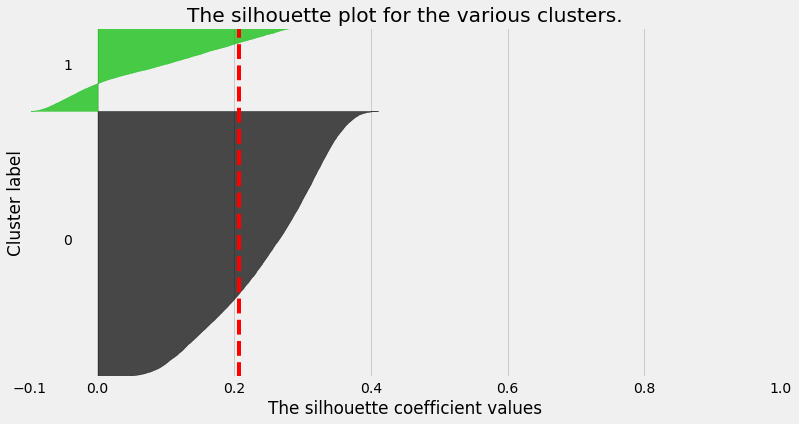

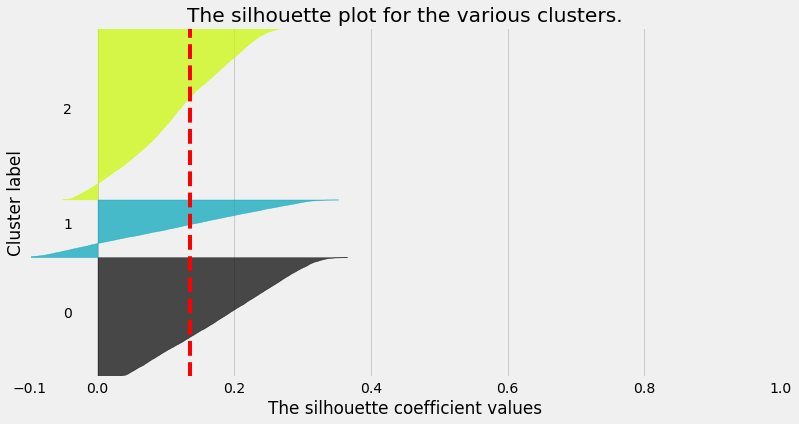

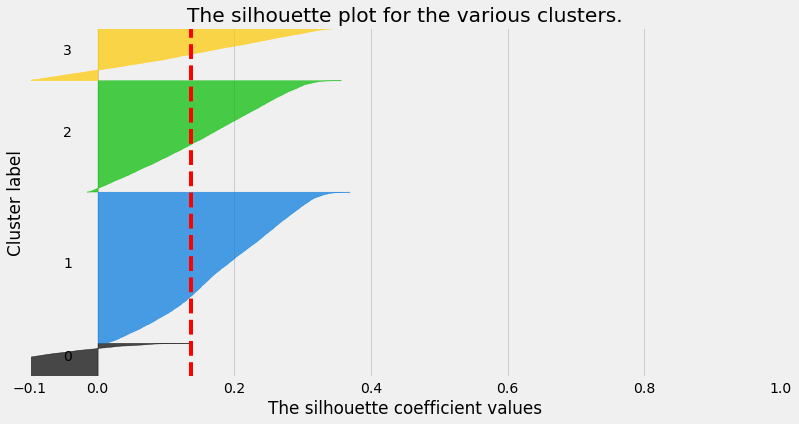

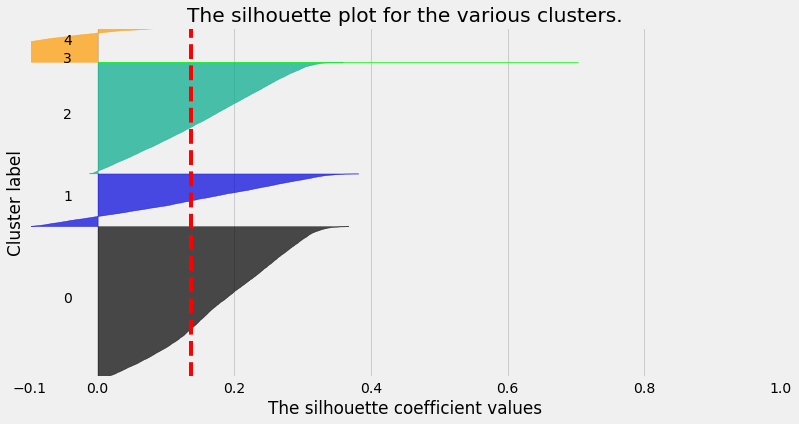

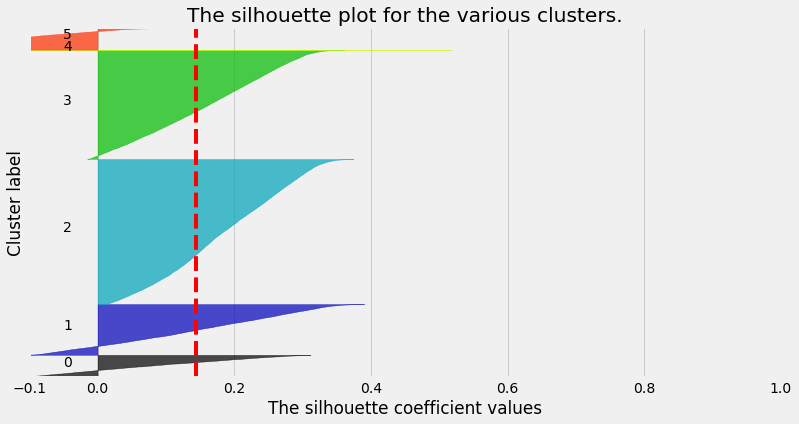

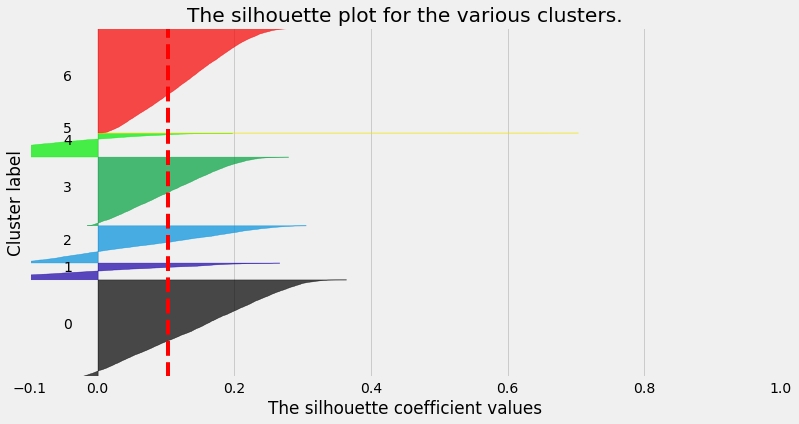

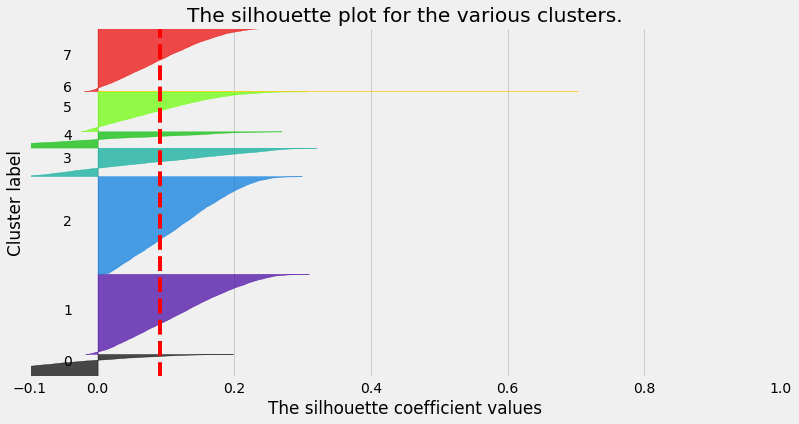

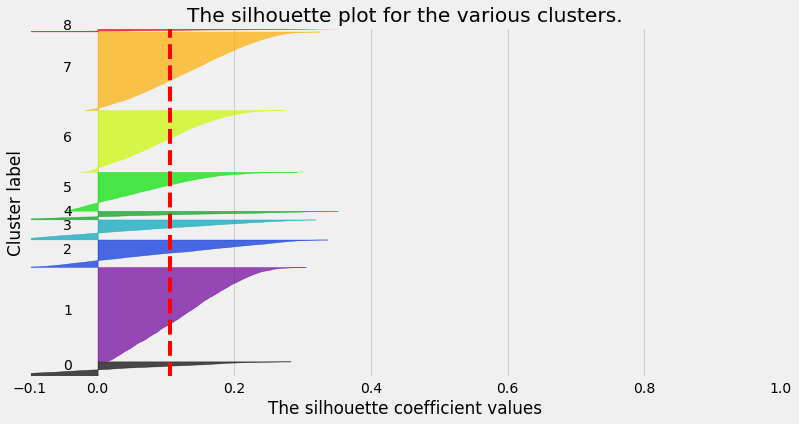

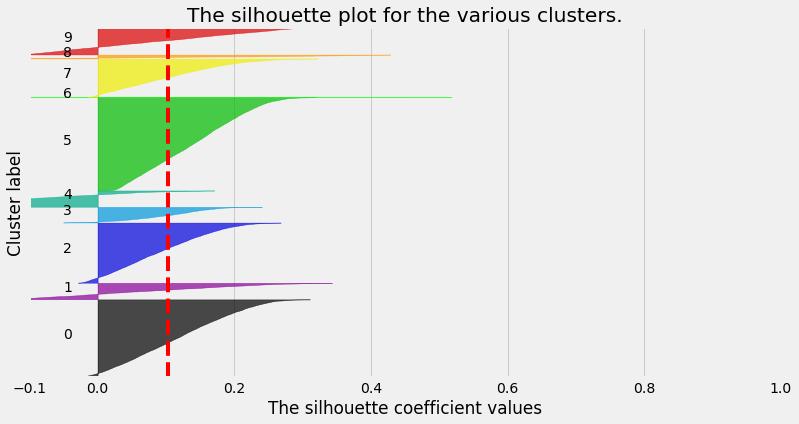

In [37]:
from sklearn.metrics import silhouette_samples, silhouette_score


for n_clusters in range(2, 11):

    fig, (ax1) = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_reduit) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=123)
    cluster_labels = clusterer.fit_predict(df_reduit)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_reduit, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_reduit, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # La línia vermella indica el valor mitjà del coeficient silhouette
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
plt.show()

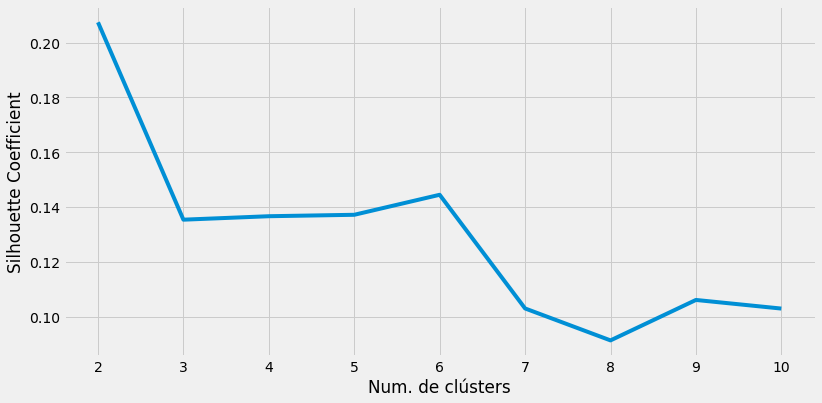

In [38]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(df_reduit)
    score = silhouette_score(df_reduit, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Num. de clústers")
plt.ylabel("Silhouette Coefficient")
plt.show()

Com observem en els plots anteriors, el clúster amb un coeficient silouhette mitjà més elevat és el de dos elements (amb una mitjana de 0.21). Li segueixen, tot i que no de gaire prop, els clústers de 6, 5, 4 i 3 elements amb un coeficients mitjans al voltant dels 0.14. Per tant, tot i que el mètode elbow, el dendeograma i el coeficient silhouette no coincideixen en la primera opció, sí que assenyalen tots tres que el nombre óptim de clústers es troba, probablement, al voltant dels 4 o 5 clústers.  